In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy import stats
# import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
# pd.options.mode.chained_assignment = None
# warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


# Kaggle's Bike Sharing Demand 

## Overview

## Introduction

### Original Features
* datetime - hourly date + timestamp  
* season - 
* * 1 = spring
* * 2 = summer
* * 3 = fall 
* * 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
* * 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
* * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
* * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
* * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

## Basic Analysis
* histogram the data
* create feature correlation heatmap
* add time features (year,year-month,month,week_number,day_of_week,day,hour)
* use log transformer 
* test increase demand year-over-year, month-over-month,

## Feature Ingeneering
* use desicision tree to convert hours into bins
* use desicision tree to convert temps into bins
* create dummy variables
* seperate data to casual and registered



Sources:
* https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/
* https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
* https://www.kaggle.com/miteshyadav/comprehensive-eda-with-xgboost-top-10-percentile

# Basic visualizations

In [135]:
ods_bike_raw = pd.read_csv('C:\\Users\\Roy\\Dropbox\\GitHub\\Final Project\\source_files\\train.csv')
ods_bike = ods_bike_raw.copy()
ods_bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [136]:
ods_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Add time measures

In [23]:
def add_time_measures(data):
#     Convert Data.datetime to datetime:
    data['datetime']=data['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
#     add various time measures:
    data['year'] = data['datetime'].apply(lambda x: x.date().year)
    data['month'] = data['datetime'].apply(lambda x: str(x.date().month).zfill(2))
    data['year_month'] = data['year'].map(str)+'-' + data['month'].map(str)
    data['weekday'] = data['datetime'].apply(lambda x: x.date().weekday())
    data['day'] = data['datetime'].apply(lambda x: str(x.date().day).zfill(2))
    data['hour'] = data['datetime'].apply(lambda x: x.time().hour)

add_time_measures(ods_bike)

ods_bike.head(1)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,year_month,weekday,day,hour
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,2011-01,5,01,0


In [36]:
def round_fractions(data):
    data['temp_round'] = data['temp'].apply(round)
    data['windspeed_round'] = data['windspeed'].apply(round)
    
round_fractions(ods_bike)
ods_bike.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,year_month,weekday,day,hour,round_temp,windspeed_round,temp_round
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2011,01,2011-01,5,01,0,10,0,10


In [92]:
# # def defome_working_hours(data):
# #     data[is_working_hours] = 
    
# # Create variable with TRUE if nationality is USA
# cond1 = ods_bike['workingday'] == 1

# # Create variable with TRUE if age is greater than 50
# cond2 = (ods_bike['month'] == '01') or (ods_bike['month'] == '02')

# # Select all casess where nationality is USA and age is greater than 50
# ods_bike[cond1 & cond2]
    
# # ods_bike.head()

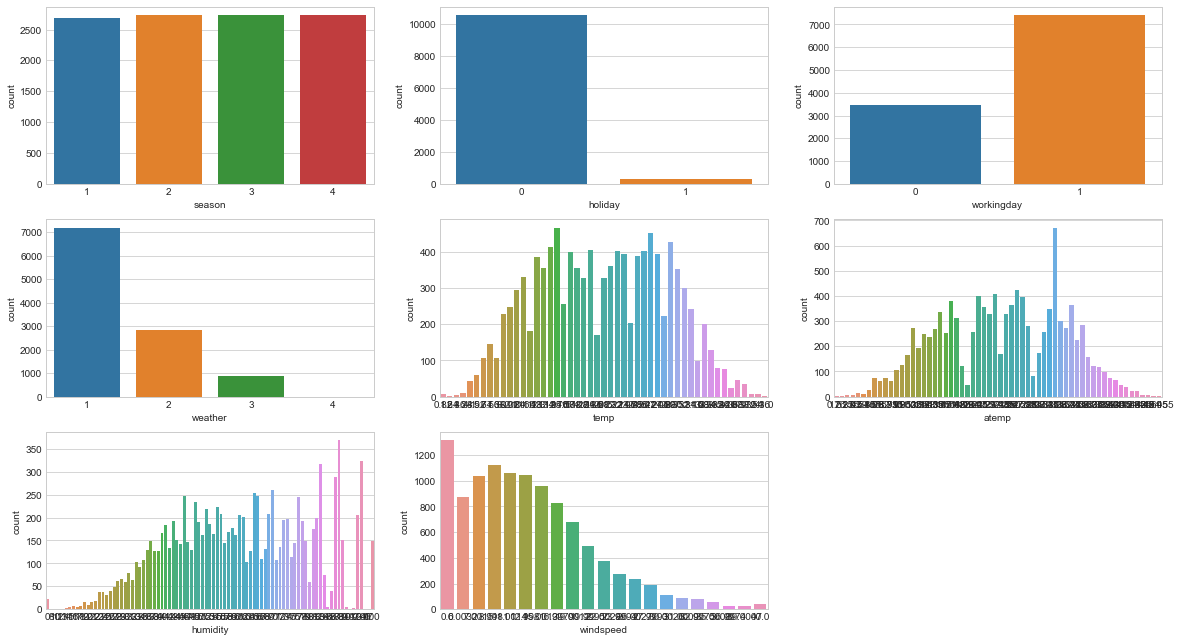

In [93]:
ods_bike_columns = ['season', 'holiday', 'workingday', 'weather', 'temp',
                    'atemp', 'humidity', 'windspeed']

plt.subplots(figsize=(20,15))
for x in range(len(ods_bike_columns)):
    plt.subplot(4,3,x+1)
    sns.countplot(ods_bike_columns[x],data=ods_bike) 

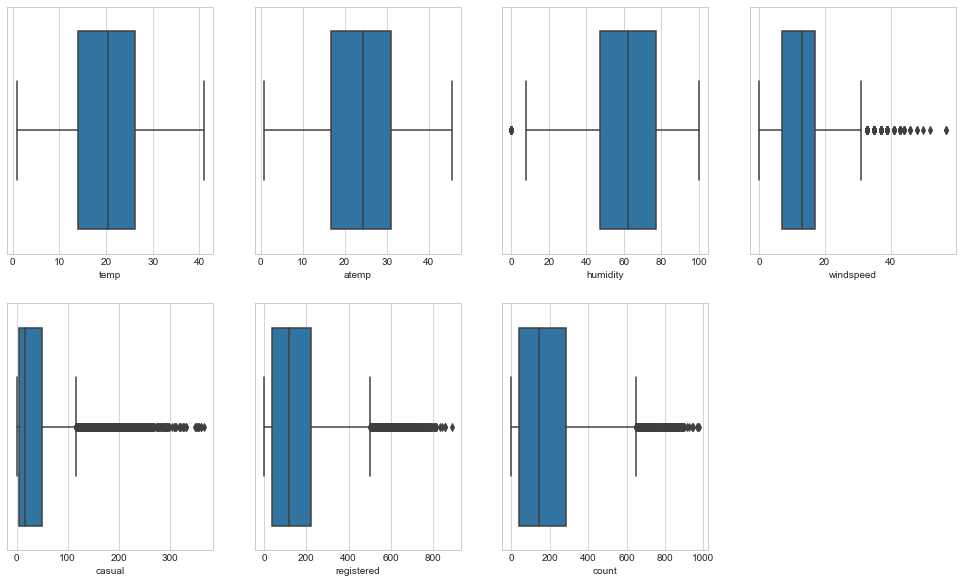

In [25]:
ods_bike_columns = ['temp','atemp', 'humidity', 'windspeed','casual', 'registered', 'count']

plt.subplots(figsize=(17,10))
for x in range(len(ods_bike_columns)):
    plt.subplot(2,4,x+1)
    sns.boxplot(ods_bike_columns[x],data=ods_bike) 

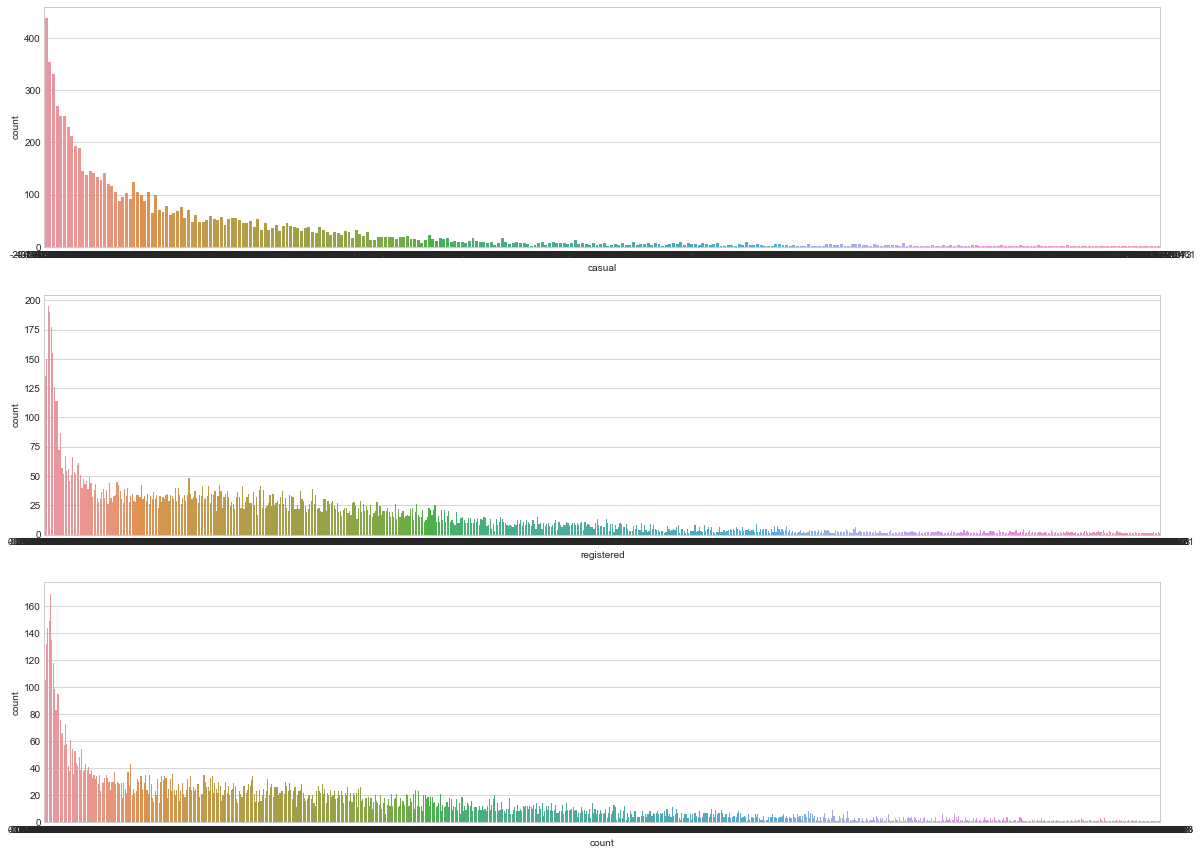

In [122]:
# Handle the inbalaced nature of the target variables:

ods_bike_columns = ['casual', 'registered', 'count']

plt.subplots(figsize=(20,15))
for x in range(len(ods_bike_columns)):
    plt.subplot(3,1,x+1)
    sns.countplot(ods_bike_columns[x],data=ods_bike) 

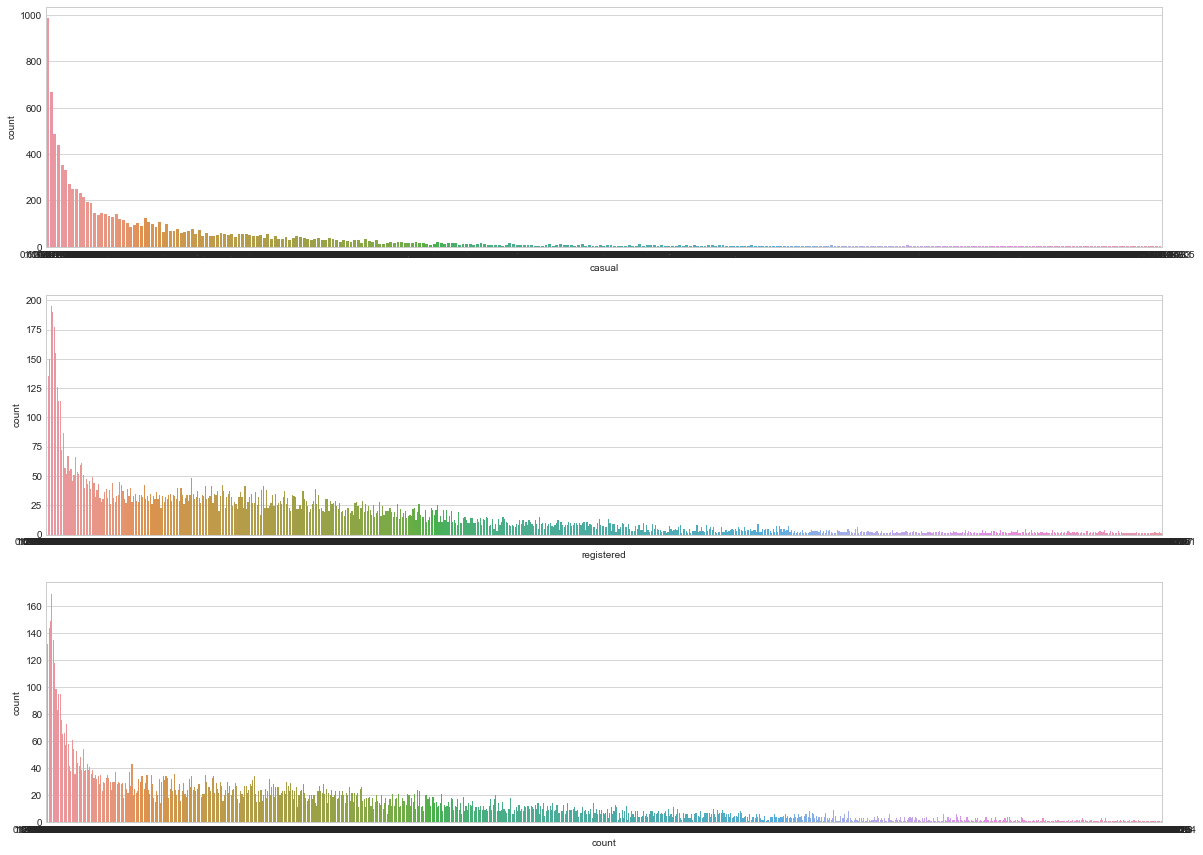

In [ ]:
temp_bike = ods_bike.copy()
temp_bike[['casual', 'registered', 'count']] = temp_bike[['casual', 'registered', 'count']].apply(np.log)

plt.subplots(figsize=(20,15))
for x in range(len(ods_bike_columns)):
    plt.subplot(3,1,x+1)
    sns.countplot(ods_bike_columns[x],data=temp_bike) 


In [ ]:
temp_bike = ods_bike.copy()
temp_bike[['casual', 'registered', 'count']] = temp_bike[['casual', 'registered', 'count']].apply(np.log1p)

plt.subplots(figsize=(20,15))
for x in range(len(ods_bike_columns)):
    plt.subplot(3,1,x+1)
    sns.countplot(ods_bike_columns[x],data=temp_bike) 


AttributeError: 'Timestamp' object has no attribute 'log'

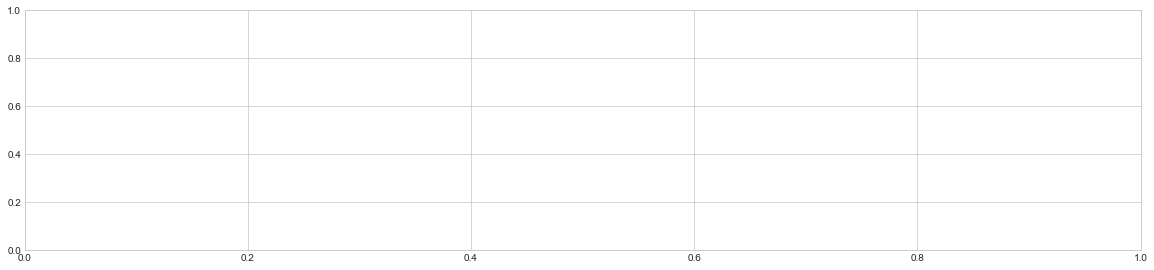

In [102]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import (QuantileTransformer,FunctionTransformer)

# log_transformer = FunctionTransformer(np.log)                                   
# log1p_transformer = FunctionTransformer(np.log1p)                                   
# quant_transformer = QuantileTransformer(output_distribution='normal')


# feature_union = FeatureUnion([
#         ('log',log_transformer),
#         ('log1p',log1p_transformer),
#         ('sqrt',quant_transformer)
# ])

# pipeline = pipeline['feature_union',feature_union]
ods_bike_columns = ['casual', 'registered', 'count']

plt.subplots(figsize=(20,15))
for x in range(len(ods_bike_columns)):
    plt.subplot(3,1,x+1)
    sns.countplot((ods_bike_columns[x]),data=ods_bike) 
    



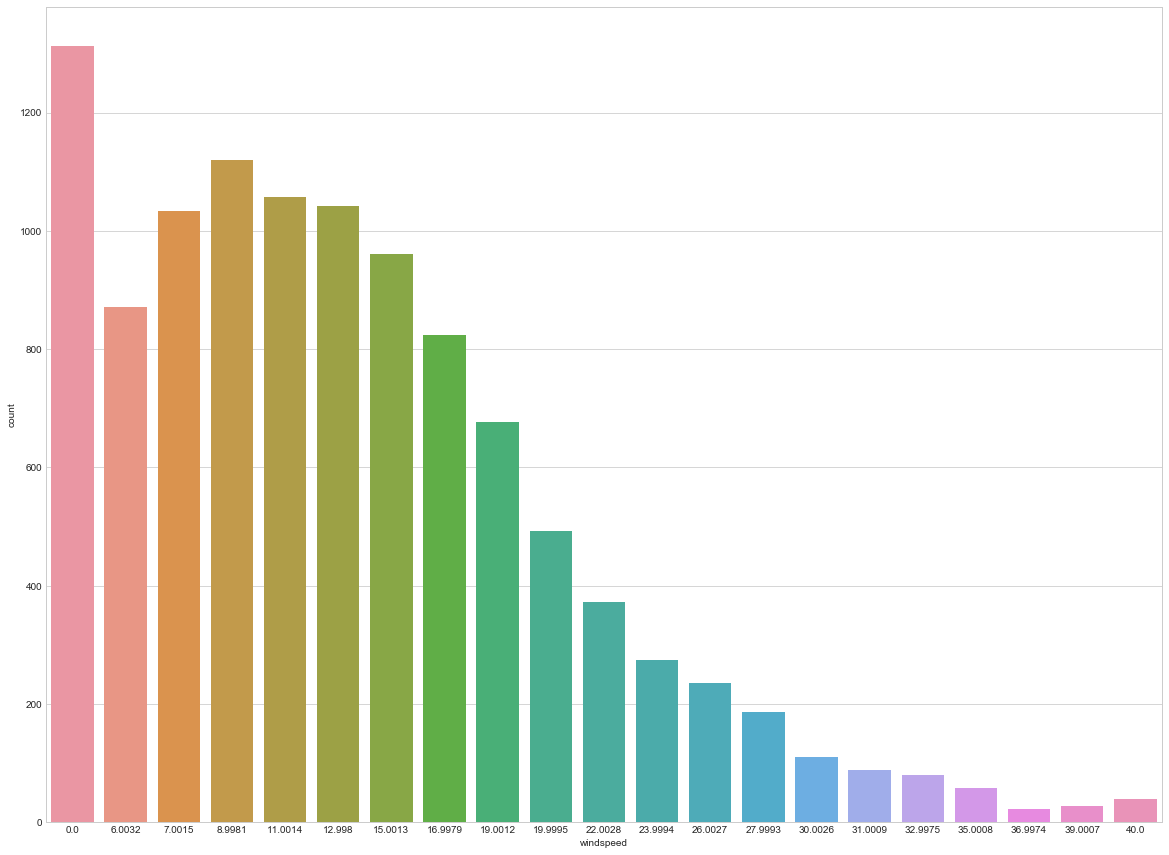

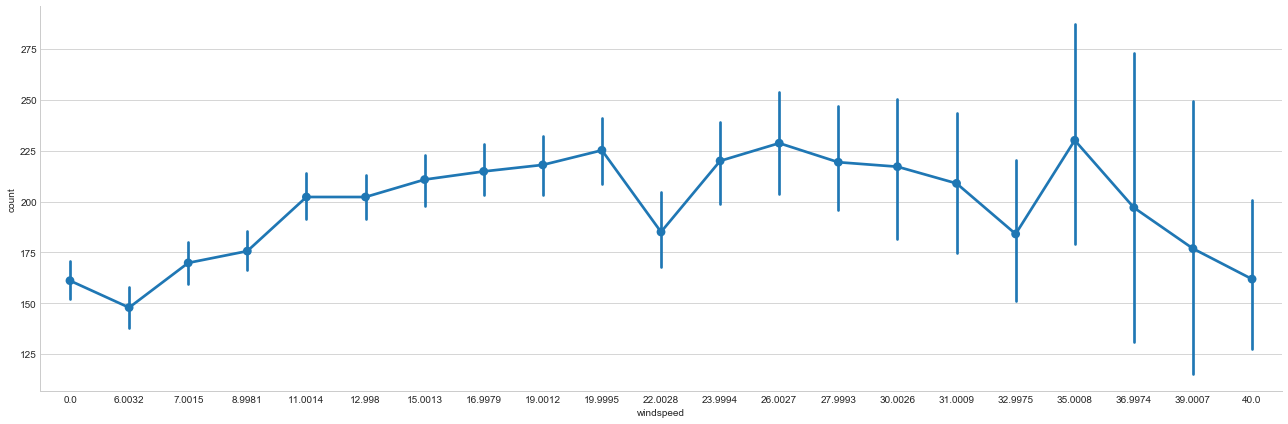

In [63]:
def remove_windspeed_outliers(data):
        data['windspeed'] = data['windspeed'].apply(lambda x: x if x < 40 else 40)
        
remove_windspeed_outliers(ods_bike)

plt.subplots(figsize=(20,15))
sns.countplot(x='windspeed',data=ods_bike)
sns.factorplot(x='windspeed',y='count',data=ods_bike,size=6,aspect=3)


## Connection between variables and Count/Registered/Casual

### Template for stacked bar plot

Text(0.5,1,'Registered Demand (Daily)')

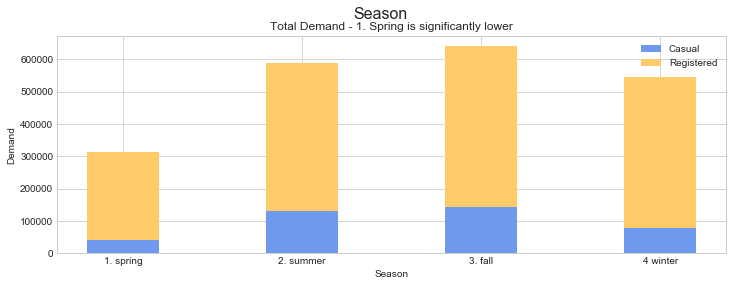

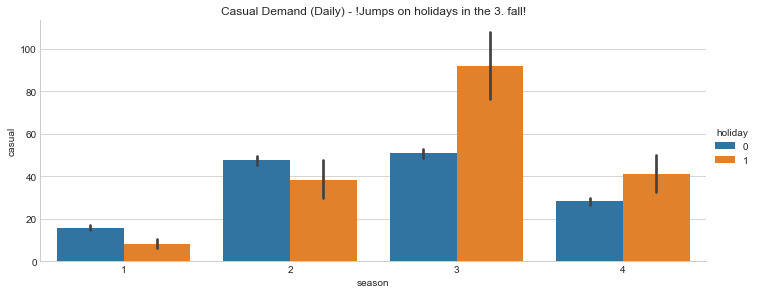

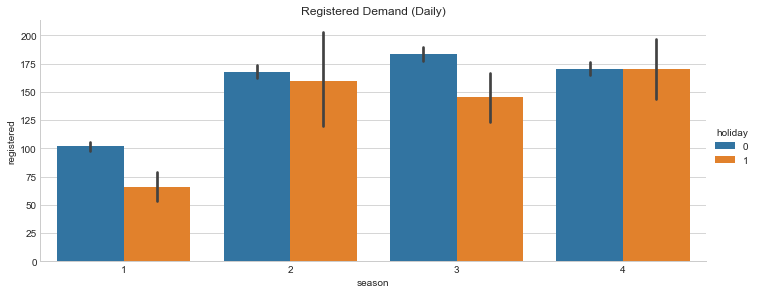

In [26]:
series_a = ods_bike.groupby('season')['casual'].sum().tolist()
series_b = ods_bike.groupby('season')['registered'].sum().tolist()
x_titles = ['1. spring','2. summer','3. fall','4 winter']
y_titles = ['Casual','Registered']

plt.subplots(figsize=(12,4))
p1 = plt.bar(x_titles, series_a, width = 0.4, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.4, color='#FFCB69',
             bottom=series_a)

plt.ylabel('Demand')
plt.xlabel('Season')
plt.title('Total Demand - 1. Spring is significantly lower')

plt.legend((p1[0], p2[0]), y_titles)

plt.suptitle('Season', fontsize=16)

sns.set_style("whitegrid")

sns.factorplot(x="season",
               y="casual",
#                col=temp_col,
               data= ods_bike[['casual','holiday',"season"]], 
               hue="holiday",
               kind="bar",
#                col="season",
               size=4, 
               aspect=2.5);
plt.title('Casual Demand (Daily) - !Jumps on holidays in the 3. fall!')

sns.factorplot(x="season",
               y="registered",
#                col=temp_col,
               data= ods_bike[['registered','holiday',"season"]], 
               hue="holiday",
               kind="bar",
#                col="season",
               size=4, 
               aspect=2.5);
plt.title('Registered Demand (Daily)')

Text(0.5,1,'Casual Daily Demand w Workingday')

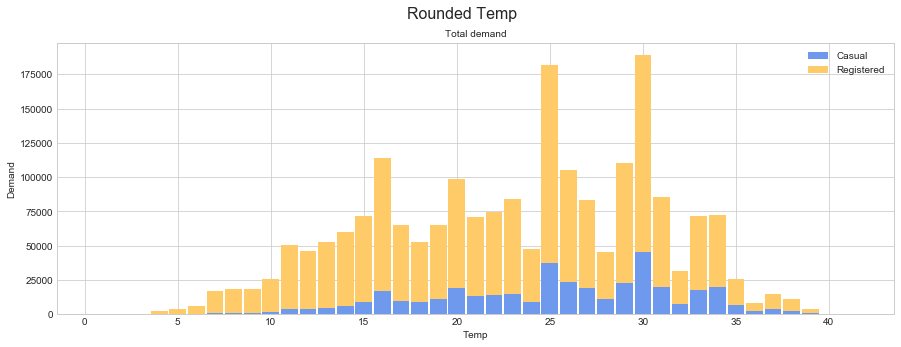

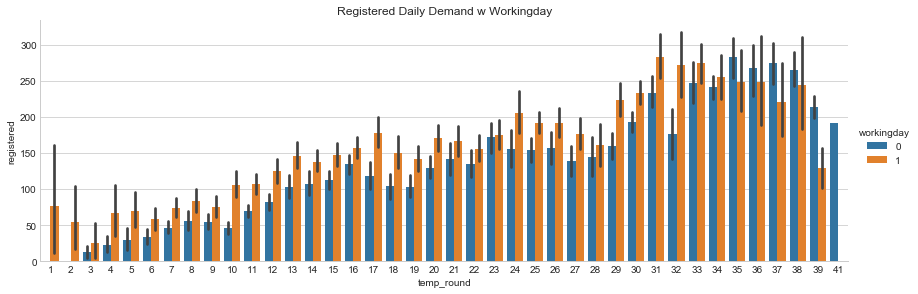

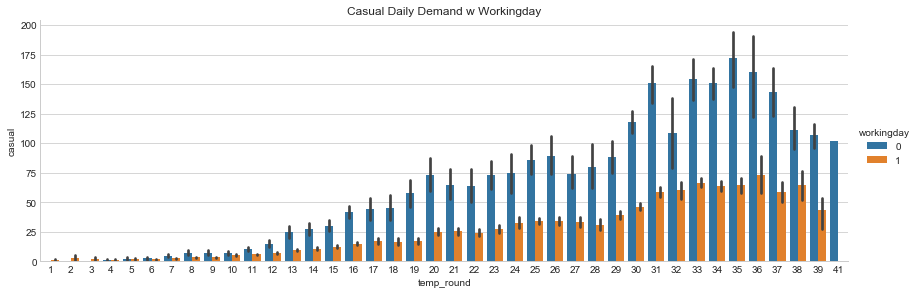

In [39]:
series_a = ods_bike.groupby('temp_round')['casual'].sum().tolist()
series_b = ods_bike.groupby('temp_round')['registered'].sum().tolist()
x_titles = ods_bike.groupby('temp_round')['casual'].sum().index.tolist()
y_titles = ['Casual','Registered']

plt.subplots(figsize=(15,5))
p1 = plt.bar(x_titles, series_a, width = 0.9, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.9, color='#FFCB69',bottom=series_a)

plt.ylabel('Demand', fontsize=10)
plt.xlabel('Temp', fontsize=10)
plt.title('Total demand', fontsize=10)

plt.legend((p1[0], p2[0]), y_titles)

plt.suptitle('Rounded Temp', fontsize=16)

sns.set_style("whitegrid")


sns.factorplot(x="temp_round",
               y='registered',
#                col=temp_col,
               data= ods_bike[['temp_round','registered','workingday']], 
               hue='workingday',
               kind="bar",
               size=4, 
               aspect=3);
plt.title('Registered Daily Demand w Workingday')

sns.factorplot(x="temp_round",
               y='casual',
#                col=temp_col,
               data= ods_bike[['temp_round','casual',"workingday"]], 
               hue="workingday",
               kind="bar",
               size=4, 
               aspect=3);
plt.title('Casual Daily Demand w Workingday')




Text(0.5,1,'Daily Demand - !windspeed over 40 are outliers, should be removed!')

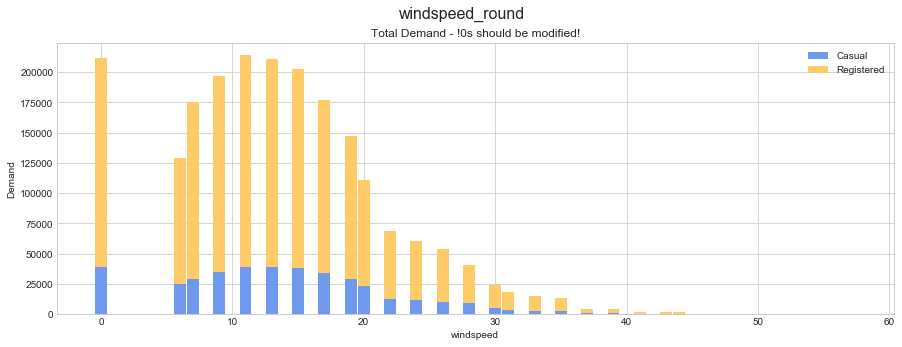

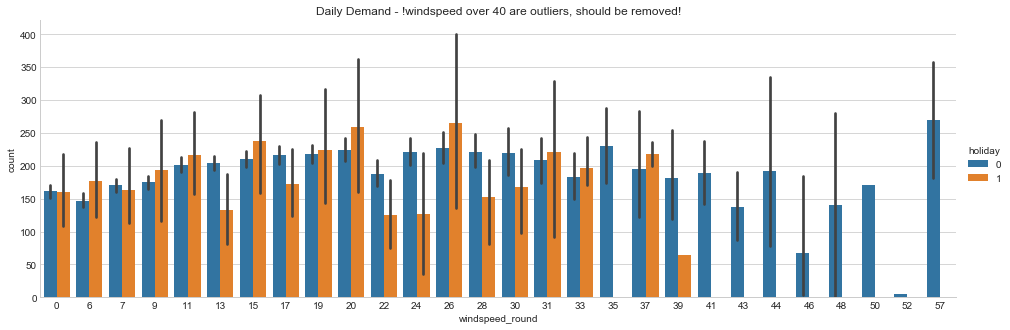

In [28]:
series_a = ods_bike.groupby('windspeed_round')['casual'].sum().tolist()
series_b = ods_bike.groupby('windspeed_round')['registered'].sum().tolist()
x_titles = ods_bike.groupby('windspeed_round')['casual'].sum().index.tolist()
y_titles = ['Casual','Registered']

plt.subplots(figsize=(15,5))
p1 = plt.bar(x_titles, series_a, width = 0.9, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.9, color='#FFCB69',bottom=series_a)

plt.ylabel('Demand')
plt.xlabel('windspeed')
plt.title('Total Demand - !0s should be modified!')

plt.legend((p1[0], p2[0]), y_titles)

plt.suptitle('windspeed_round', fontsize=16)

sns.set_style("whitegrid")


sns.factorplot(x="windspeed_round",
               y='count',
#                col=temp_col,
               data= ods_bike[['windspeed_round','count',"holiday"]], 
               hue="holiday",
               kind="bar",
               size=4.5, 
               aspect=3);
plt.title('Daily Demand - !windspeed over 40 are outliers, should be removed!')


Daily Demand - !windspeed over 40 are outliers, should be removed!


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE62DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CDB0B38>]], dtype=object)

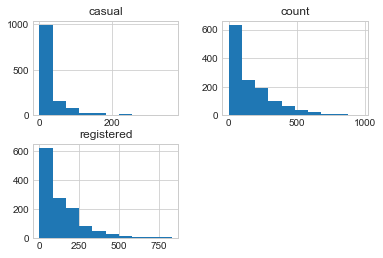

In [41]:
print('Daily Demand - !windspeed over 40 are outliers, should be removed!')
ods_bike[ods_bike.windspeed_round == 0][['casual','registered','count']].hist()


Text(0.5,1,'Daily Casual')

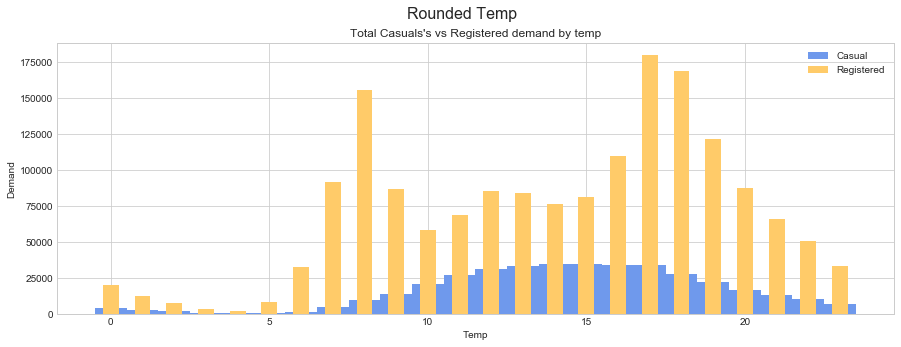

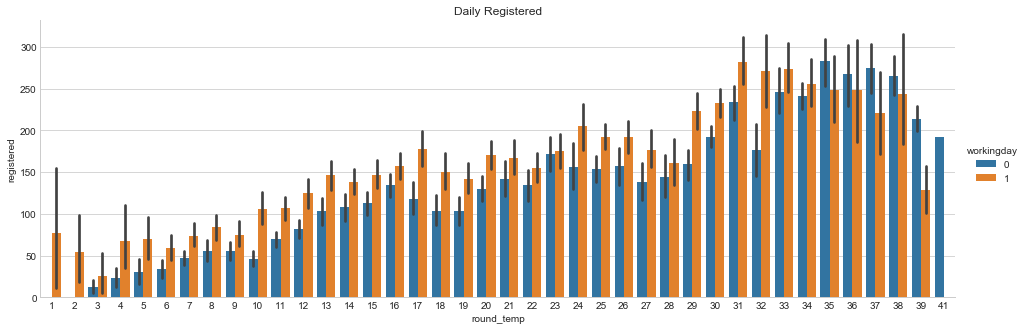

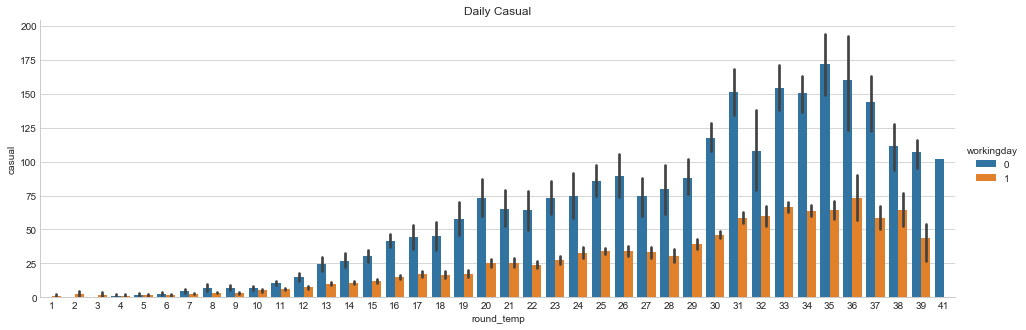

In [30]:
series_a = ods_bike.groupby('hour')['casual'].sum().tolist()
series_b = ods_bike.groupby('hour')['registered'].sum().tolist()
x_titles = ods_bike.groupby('hour')['casual'].sum().index.tolist()
y_titles = ['Casual','Registered']

plt.subplots(figsize=(15,5))
p1 = plt.bar(x_titles, series_a, width = 1, color='#6F99EC')
p2 = plt.bar(x_titles, series_b, width = 0.5, color='#FFCB69')

plt.ylabel('Demand')
plt.xlabel('Temp')
plt.title('Total Casuals\'s vs Registered demand by temp')

plt.legend((p1[0], p2[0]), y_titles)

plt.suptitle('Rounded Temp', fontsize=16)

# sns.set_style("whitegrid")

sns.factorplot(x="round_temp",
               y='registered',
#                col=temp_col,
               data= ods_bike[['round_temp','registered','workingday']], 
               hue='workingday',
               kind="bar",
               size=4.5, 
               aspect=3);
plt.title('Daily Registered')

sns.factorplot(x="round_temp",
               y='casual',
#                col=temp_col,
               data= ods_bike[['round_temp','casual',"workingday"]], 
               hue="workingday",
               kind="bar",
               size=4.5, 
               aspect=3);
plt.title('Daily Casual')

##### Monthly demand is growing with time - for each month there is higher demand comapring to last year.

Text(0.5,0.98,'Daily demand by Year_Month - Monthly demand is growing with time - for each month there is higher demand comapring to last year.')

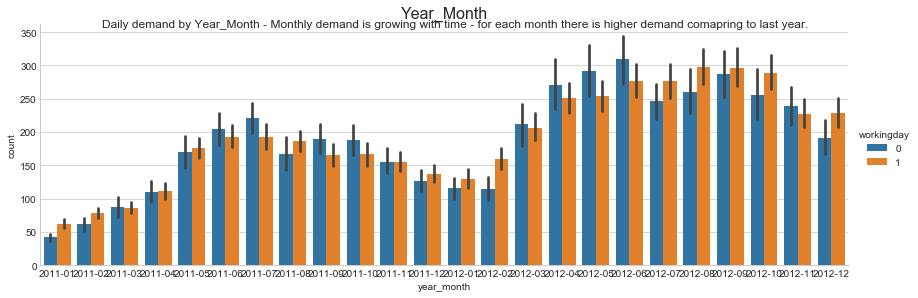

In [31]:
sns.factorplot(x="year_month",
               y='count',
#                col=temp_col,
               data= ods_bike[['year_month','count',"workingday"]], 
               hue="workingday",
               kind="bar",
               size=4, 
               aspect=3);
plt.title('Year_Month',fontsize=16)
plt.suptitle('Daily demand by Year_Month - Monthly demand is growing with time - for each month there is higher demand comapring to last year.', fontsize=12)

##### Casual demand: 
* Peaks at 14:00 on working days.
* Peaks at 17:00 on non-working days.
* is lower on working days. 

Text(0.5,1,'Not WorkingDay')

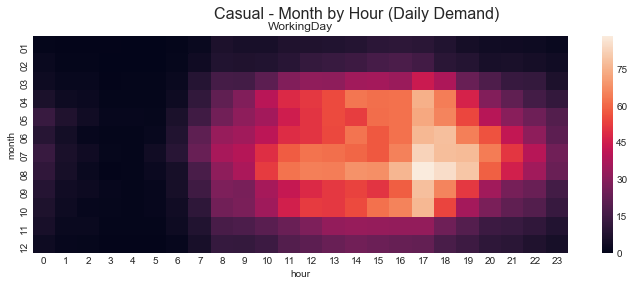

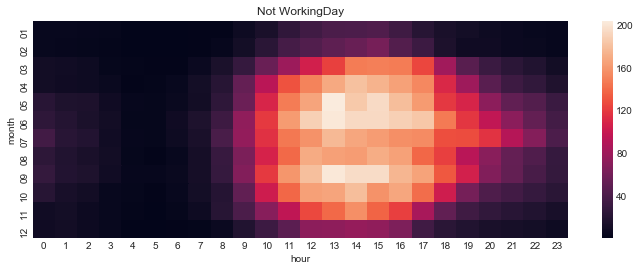

In [32]:
plt.subplots(figsize=(12,4))
sns.heatmap(pd.pivot_table(ods_bike[ods_bike.workingday == 1], values='casual', index=['month'],columns=['hour'],aggfunc=np.mean))
plt.title('WorkingDay', fontsize=12)

plt.suptitle('Casual - Month by Hour (Daily Demand)', fontsize=16)

plt.subplots(figsize=(12,4))
sns.heatmap(pd.pivot_table(ods_bike[ods_bike.workingday == 0], values='casual', index=['month'],columns=['hour'],aggfunc=np.mean))
plt.title('Not WorkingDay', fontsize=12)


Text(0.5,1,'Not WorkingDay')

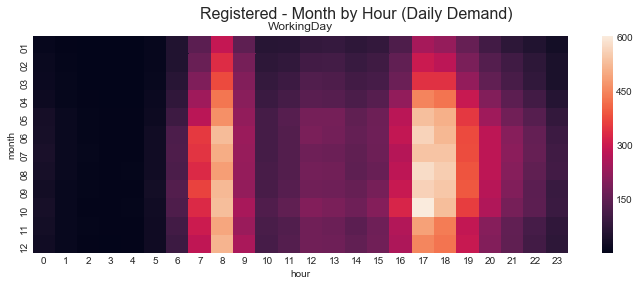

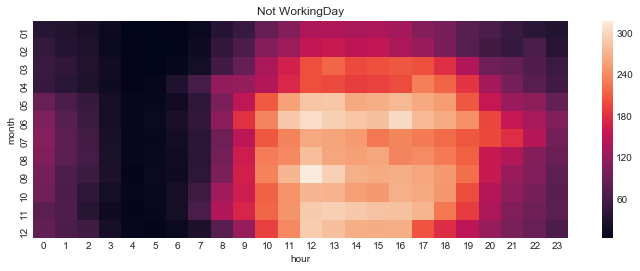

In [33]:
plt.subplots(figsize=(12,4))
sns.heatmap(pd.pivot_table(ods_bike[ods_bike.workingday == 1], values='registered', index=['month'],columns=['hour'],aggfunc=np.mean))
plt.title('WorkingDay', fontsize=12)

plt.suptitle('Registered - Month by Hour (Daily Demand)', fontsize=16)

plt.subplots(figsize=(12,4))
sns.heatmap(pd.pivot_table(ods_bike[ods_bike.workingday == 0], values='registered', index=['month'],columns=['hour'],aggfunc=np.mean))
plt.title('Not WorkingDay', fontsize=12)
